Colab Notebook Link:
1. First half:  
https://colab.research.google.com/drive/1SSh6kdI5e5nBF8ajBLpNOoNjuAqkvcJm#scrollTo=qvXW2jFSVXLT
2. Second half:  
https://colab.research.google.com/drive/1y6kgQvb-1cqHLdIvNzfrzDbAR0NfRKkn#scrollTo=zpjsa8d9mn9P

# US Rental Price Prediction and Analysis
#### Team 13
By: Peng Zhao, Pin-Hao Pan, Huawan Zhong, Lujia Yu

## 1. Introduction
The cost of housing is a significant consideration for international students when selecting a city to live in the United States. To assist in making informed decisions, our project aims to develop a predictive model to estimate rental prices for apartments across major U.S. cities, including Boston, New York City, Los Angeles, and Chicago. Utilizing a dataset from the UCI Machine Learning Repository, we aim to analyze and compare rental costs among these cities. We aim to have a combination of regression models—including Linear Regression, Random Forest etc. This analysis will help international students make informed decisions about where to live based on affordability and housing quality. Because our team considers that housing is a significant portion of a student’s budget. The insights we gain from these models will help us assess rental costs in a way that balances affordability with the quality of urban life in those metropolitan areas.



## 2. Objective
The objective of this project is to develop a predictive model to estimate apartment rental prices across major U.S. cities and provide actionable insights into cost-effective housing options. By analyzing a comprehensive dataset, the project aims to:  
1. Identify key factors influencing rental prices, such as location, amenities, and apartment size.  
2. Compare the affordability of rental options across various cities, highlighting economical choices for international students.  
3. Provide data-driven recommendations to help international students make informed decisions about where to live, considering budget and lifestyle preferences.  

The ultimate goal is to empower students and other renters with insights that balance affordability with quality of urban living, while also supporting real estate stakeholders in understanding market dynamics.

## 3. Data Source & Description


#### 3.1. Data Description


We are using the "Apartments for Rent Classified" dataset from the UCI Machine Learning Repository. The dataset is available at UCI Archive(https://www.kaggle.com/code/saurav9786/rent-price-recommender). It contains information on rental apartments, including prices, amenities, location, and apartment size, across different cities in the United States. This makes it suitable for comparing living expenses among major cities.

| Column | Description | Data Type |
| :- | :- | :- |
| id | unique identifier of apartment | Integer |
|category| category of classified|Categorical|
|title| title text of apartment|Categorical|
|body|body text of apartment|Categorical|
|amenities| like AC, basketball,cable, gym, internet access, pool, refrigerator etc.|Categorical|
|bathrooms|number of bathrooms|Integer|
|bedrooms|number of bedrooms|Categorical|
|currency|price in current|Categorical|
|fee|fee|Categorical|
|has_photo|photo of apartment|Categorical|
|pets_allowed|what pets are allowed dogs/cats etc.|Categorical|
|price|rental price of apartment|Integer|
|price_display|price converted into display for reader|Integer|
|price_type	|price in USD|Categorical|
|square_feet|size of the apartment|Categorical|
|address|where the apartment is located (detailed)|Categorical|
|cityname| where the apartment is located (city)|Categorical|
|state|where the apartment is located (state)|Integer|
|latitude|where the apartment is located (latitude)|Integer|
|longitude|where the apartment is located (longitude)|Categorical|
|source|origin of classified|Integer|
|time|when classified was created|Categorical|


#### 3.2. Load the Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
csv_file = ('/content/drive/MyDrive/BA-810 Project /apartments_for_rent_classified_100K.csv')
csv_file
import pandas as pd
df = pd.read_csv(csv_file,encoding='Windows-1252', sep=';')
df.head()

<ipython-input-68-0eaa28acf196>:4: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file,encoding='Windows-1252', sep=';')


id                category                            title  \
0  5668640009  housing/rent/apartment       One BR 507 & 509 Esplanade   
1  5668639818  housing/rent/apartment      Three BR 146 Lochview Drive   
2  5668639686  housing/rent/apartment  Three BR 3101 Morningside Drive   
3  5668639659  housing/rent/apartment            Two BR 209 Aegean Way   
4  5668639374  housing/rent/apartment         One BR 4805 Marquette NE   

                                                body amenities  bathrooms  \
0  This unit is located at 507 & 509 Esplanade, R...       NaN        1.0   
1  This unit is located at 146 Lochview Drive, Ne...       NaN        1.5   
2  This unit is located at 3101 Morningside Drive...       NaN        2.0   
3  This unit is located at 209 Aegean Way, Vacavi...       NaN        1.0   
4  This unit is located at 4805 Marquette NE, Alb...       NaN        1.0   

   bedrooms currency fee  has_photo  ... price_display  price_type  \
0       1.0      USD  No  Thumbnail  ...        $2,195     Monthly   
1       3.0      USD  No  Thumbnail  ...        $1,250     Monthly   
2       3.0      USD  No  Thumbnail  ...        $1,395     Monthly   
3       2.0      USD  No  Thumbnail  ...        $1,600     Monthly   
4       1.0      USD  No  Thumbnail  ...          $975     Monthly   

  square_feet              address       cityname state latitude longitude  \
0         542   507  509 Esplanade  Redondo Beach    CA  33.8520 -118.3759   
1        1500      146 Lochview Dr   Newport News    VA  37.0867  -76.4941   
2        1650  3101 Morningside Dr        Raleigh    NC  35.8230  -78.6438   
3         820       209 Aegean Way      Vacaville    CA  38.3622 -121.9712   
4         624    4805 Marquette NE    Albuquerque    NM  35.1038 -106.6110   

      source        time  
0  RentLingo  1577360355  
1  RentLingo  1577360340  
2  RentLingo  1577360332  
3  RentLingo  1577360330  
4  RentLingo  1577360308  

[5 rows x 22 columns]

 **NOTE: Why use `encoding='Windows-1252'`?:**   
 There is an inconsistency in the number of fields (columns) on line 4 of the CSV file. Specifically, line 4 has one more field than expected.


## 4. Dataset Exploration

In [ ]:
df.shape

(99492, 22)

In [ ]:
df.dtypes

id                 int64
category          object
title             object
body              object
amenities         object
bathrooms        float64
bedrooms         float64
currency          object
fee               object
has_photo         object
pets_allowed      object
price            float64
price_display     object
price_type        object
square_feet        int64
address           object
cityname          object
state             object
latitude         float64
longitude        float64
source            object
time               int64
dtype: object

In [ ]:
df.describe()

id     bathrooms      bedrooms         price   square_feet  \
count  9.949200e+04  99429.000000  99368.000000  99491.000000  99492.000000   
mean   5.358321e+09      1.445323      1.728212   1527.057281    956.430688   
std    1.847404e+08      0.547021      0.749200    904.245882    417.571522   
min    5.121046e+09      1.000000      0.000000    100.000000    101.000000   
25%    5.197950e+09      1.000000      1.000000   1013.000000    729.000000   
50%    5.508673e+09      1.000000      2.000000   1350.000000    900.000000   
75%    5.509007e+09      2.000000      2.000000   1795.000000   1115.000000   
max    5.669439e+09      9.000000      9.000000  52500.000000  50000.000000   

           latitude     longitude          time  
count  99467.000000  99467.000000  9.949200e+04  
mean      36.947988    -91.568656  1.559665e+09  
std        4.599461     15.817168  1.105077e+07  
min       19.573800   -159.369800  1.544174e+09  
25%       33.746500   -104.791900  1.550832e+09  
50%       37.228200    -84.562300  1.568745e+09  
75%       39.953000    -77.608200  1.568767e+09  
max       64.833200    -68.778800  1.577391e+09

<Figure size 1500x1000 with 0 Axes>

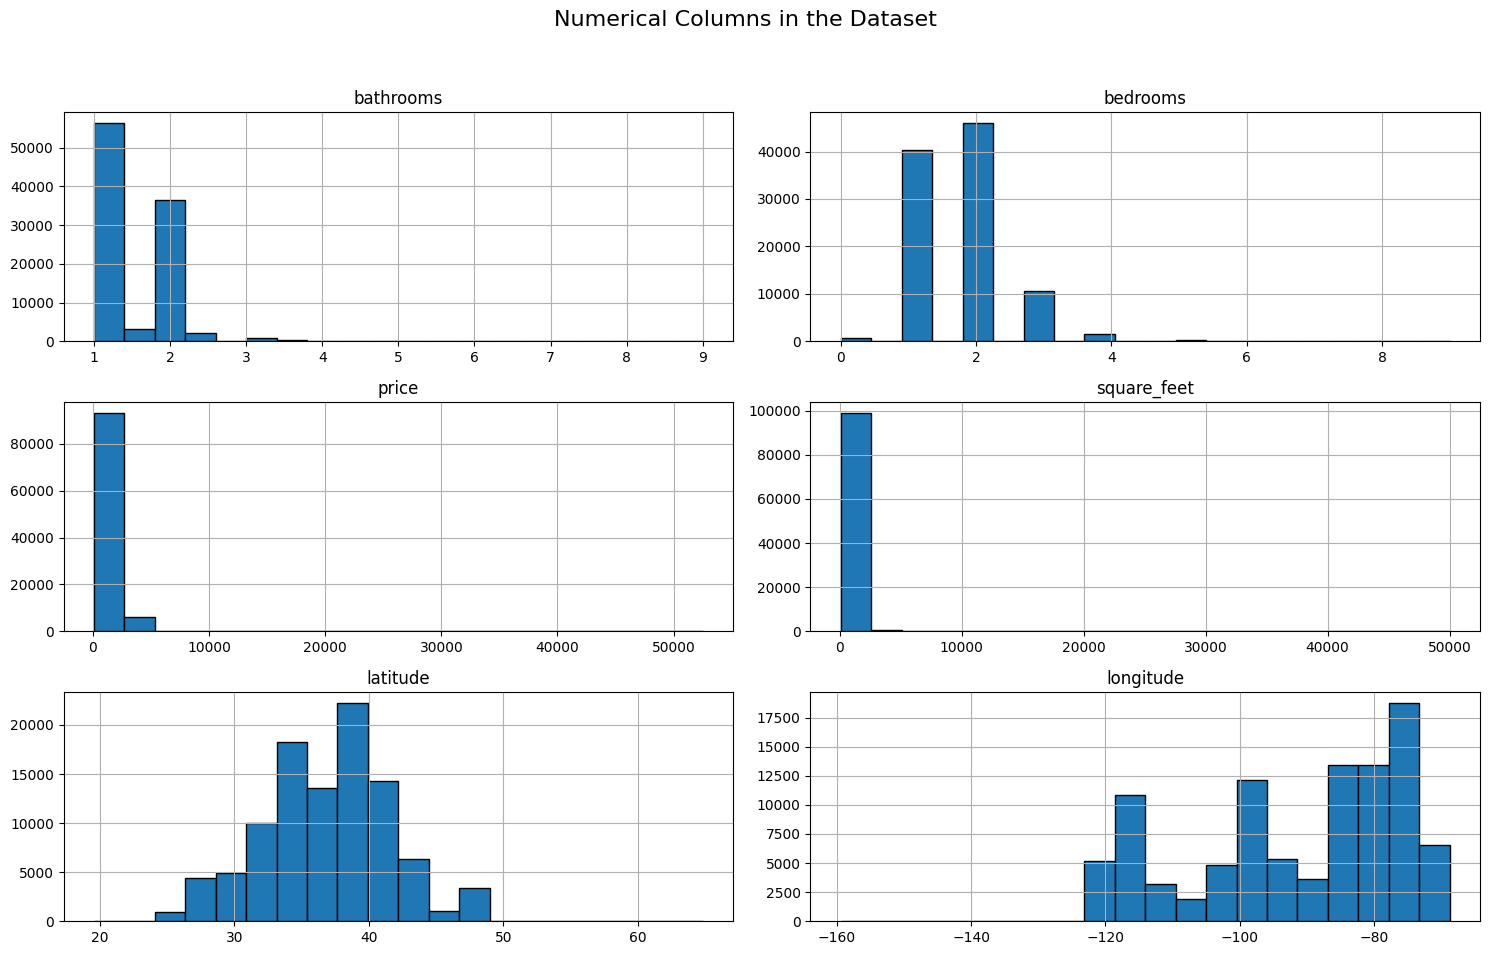

In [ ]:
import matplotlib.pyplot as plt
numerical_columns = ['bathrooms', 'bedrooms', 'price', 'square_feet', 'latitude', 'longitude']
plt.figure(figsize=(15, 10))
df[numerical_columns].hist(figsize=(15, 10), bins=20, edgecolor='black')
plt.suptitle('Numerical Columns in the Dataset', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

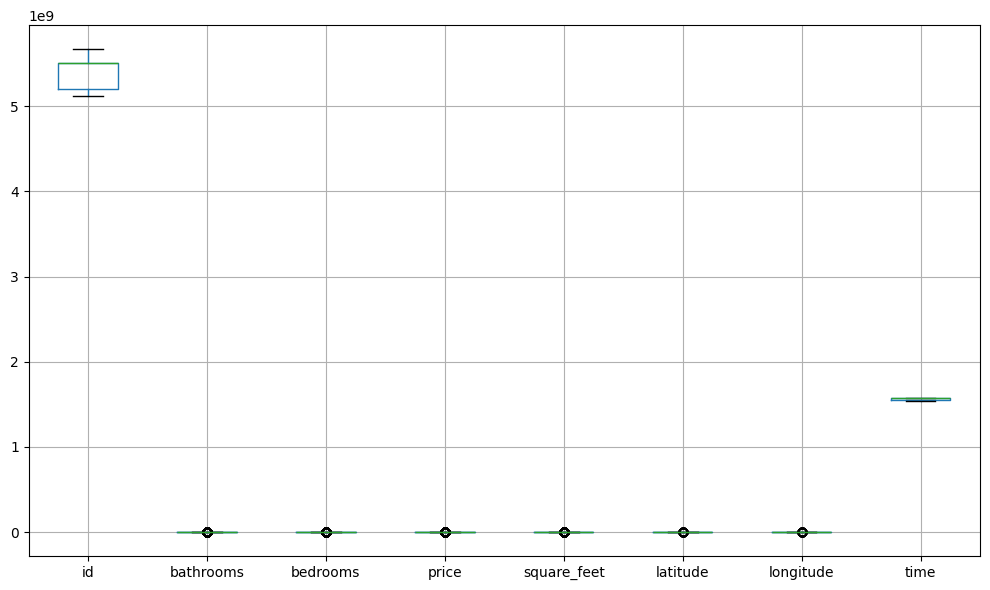

In [ ]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(figsize=(10, 6))
df.boxplot(ax=axes)
plt.tight_layout()
plt.show()

In [ ]:
df.isnull().sum()

id                   0
category             0
title                0
body                 0
amenities        16044
bathrooms           63
bedrooms           124
currency             0
fee                  0
has_photo            0
pets_allowed     60424
price                1
price_display        1
price_type           0
square_feet          0
address          91549
cityname           302
state              302
latitude            25
longitude           25
source               0
time                 0
dtype: int64

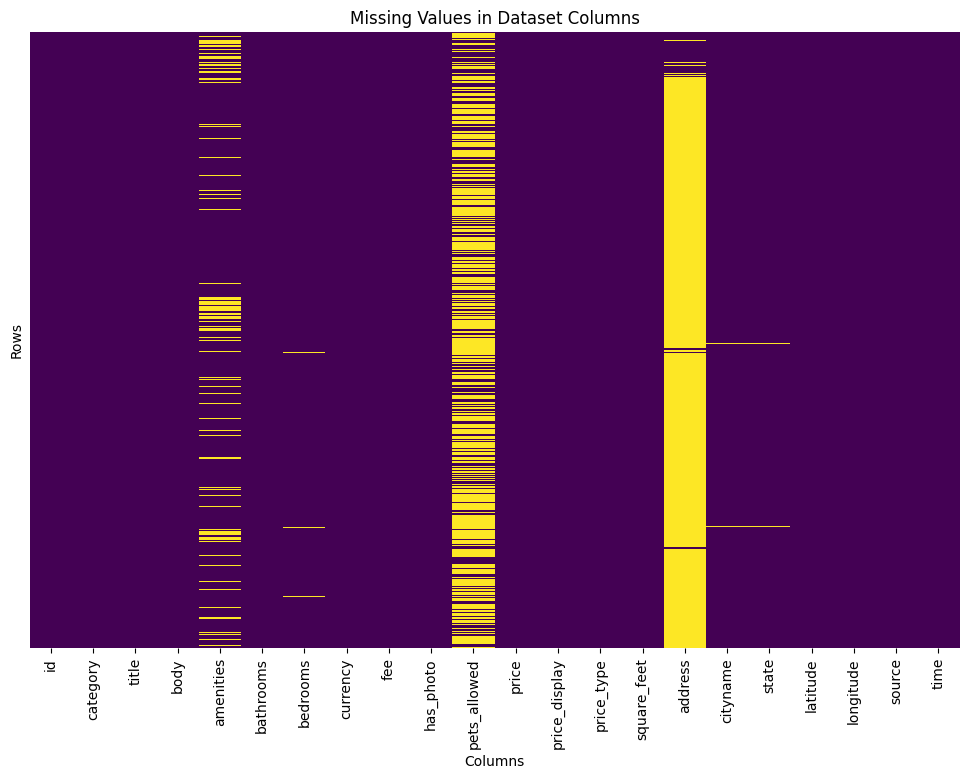

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize missing values per column
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title("Missing Values in Dataset Columns")
plt.xlabel("Columns")
plt.ylabel("Rows")
plt.show()

## 5. Data Cleaning

### 5.1. Column Selection

In this part, we considered do we need the column `address` here.

In [ ]:
df1 = df.dropna(subset=['address'])

In [ ]:
df1.shape

(7943, 22)

In [ ]:
df.shape

(99492, 22)

After analyzing the dataset, we found that removing the missing values from this column would significantly reduce the size of the dataset, indicating a high proportion of missing data. As a result, we decided to drop this column to maintain the integrity and usability of the dataset.

In [ ]:
df = df.drop(columns=['address'])

### 5.2. Variables Transform

In the next step, we will retain the `pets_allowed` column as a binary variable. We will treat any `NaN` values as 0, indicating that pets are not allowed, while all other values will be coded as 1, signifying that pets are allowed.

In [ ]:
df['pets_allowed'].value_counts(dropna=False)

pets_allowed
NaN               60424
Cats,Dogs         37097
Cats               1843
Dogs                127
Cats,Dogs,None        1
Name: count, dtype: int64

In [ ]:
df = df[df['pets_allowed'] != 'Cats,Dogs,None']
df['pets_allowed'] = df['pets_allowed'].replace({'Cats': 1, 'Dogs': 1, 'Cats,Dogs': 1, 'None': 0}).fillna(0).astype(int)

df['pets_allowed'].value_counts(dropna=False)

<ipython-input-19-de1c9eb52af2>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['pets_allowed'] = df['pets_allowed'].replace({'Cats': 1, 'Dogs': 1, 'Cats,Dogs': 1, 'None': 0}).fillna(0).astype(int)
<ipython-input-19-de1c9eb52af2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pets_allowed'] = df['pets_allowed'].replace({'Cats': 1, 'Dogs': 1, 'Cats,Dogs': 1, 'None': 0}).fillna(0).astype(int)


pets_allowed
0    60424
1    39067
Name: count, dtype: int64

In [ ]:
df.dropna(subset=['longitude', 'latitude', 'cityname', 'price', 'price_display', 'bathrooms', 'bedrooms'], inplace=True)
df.shape

(99006, 21)

To facilitate a more effective evaluation of the amenities, we have decided to assign a score to each distinct amenity and store the results in a new column called `amenity_scores`.

In [ ]:
unique_amenities = df['amenities'].dropna().unique()
unique_amenities

array(['Fireplace,Gym,Parking,Pool,Storage,Wood Floors', 'Gated,Pool',
       'Dishwasher,Parking,Pool', ..., 'Dishwasher,Doorman',
       'AC,Elevator,Parking,Patio/Deck,Pool,Washer Dryer',
       'Dishwasher,Doorman,Patio/Deck,Refrigerator,Storage,Washer Dryer,Wood Floors'],
      dtype=object)

In [ ]:
amenities_split = df['amenities'].dropna().str.split(',').explode().unique()
sorted(amenities_split)

['AC',
 'Alarm',
 'Basketball',
 'Cable or Satellite',
 'Clubhouse',
 'Dishwasher',
 'Doorman',
 'Elevator',
 'Fireplace',
 'Garbage Disposal',
 'Gated',
 'Golf',
 'Gym',
 'Hot Tub',
 'Internet Access',
 'Luxury',
 'Parking',
 'Patio/Deck',
 'Playground',
 'Pool',
 'Refrigerator',
 'Storage',
 'TV',
 'Tennis',
 'View',
 'Washer Dryer',
 'Wood Floors']

In [ ]:
amenity_scores = {
    'AC': 5, 'Alarm': 2, 'Basketball': 6, 'Cable or Satellite': 3, 'Clubhouse': 4,
    'Dishwasher': 2, 'Doorman': 8, 'Elevator': 7, 'Fireplace': 3, 'Garbage Disposal': 8,
    'Gated': 6, 'Golf': 10, 'Gym': 8, 'Hot Tub': 2, 'Internet Access': 7, 'Luxury': 9,
    'Parking': 4, 'Patio/Deck': 5, 'Playground': 3, 'Pool': 8, 'Refrigerator': 1,
    'Storage': 1, 'TV': 6, 'Tennis': 7, 'View': 5, 'Washer Dryer': 7, 'Wood Floors': 8
}
def calculate_amenity_score(amenities):
    if pd.isnull(amenities):
        return 0
    else:
        return sum(amenity_scores.get(amenity.strip(), 0) for amenity in amenities.split(','))

df['amenity_score'] = df['amenities'].apply(calculate_amenity_score)
df['amenity_score'].describe()

count    99006.000000
mean        18.857281
std         16.572294
min          0.000000
25%          5.000000
50%         16.000000
75%         28.000000
max         93.000000
Name: amenity_score, dtype: float64

### 5.3. Figure Out Outliers

In order to figure out if there are any outliers in price and the area of the apartment, we use boxplot to visualize it.

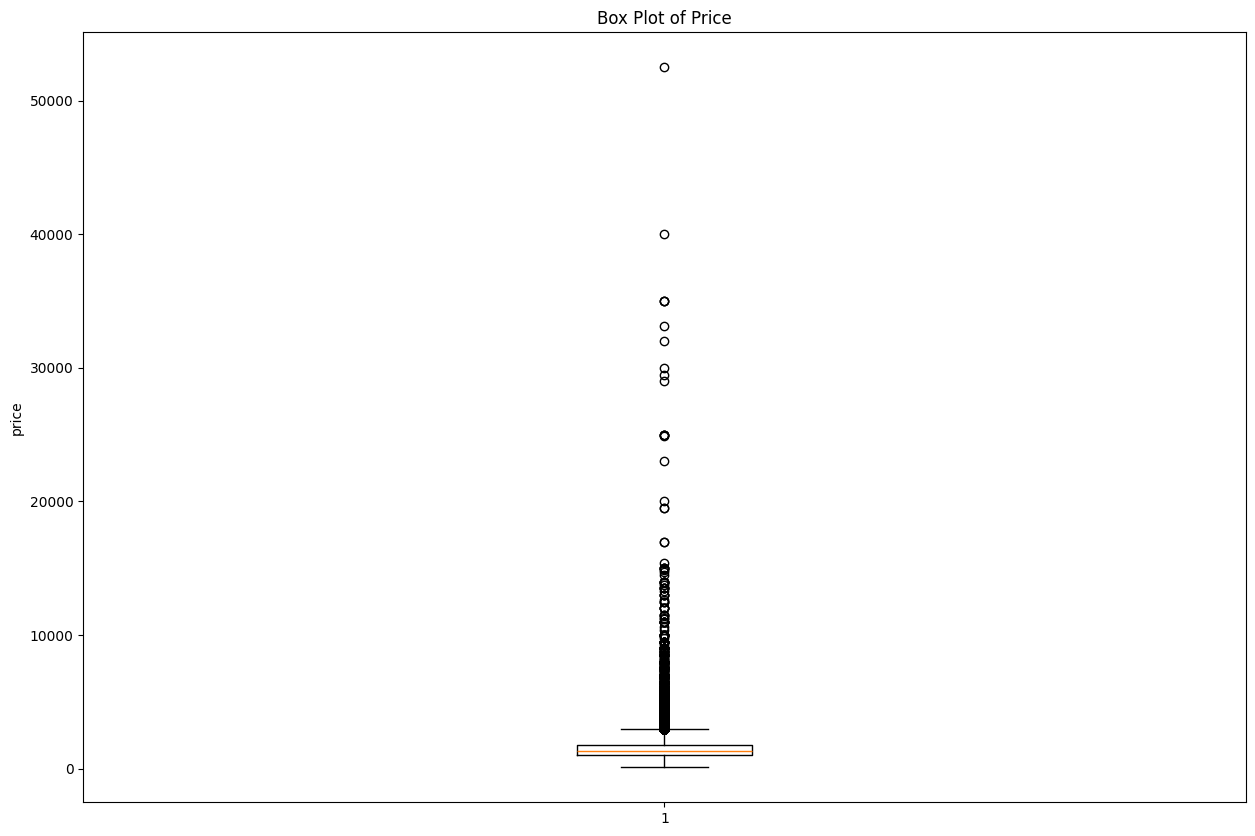

In [ ]:
plt.figure(figsize=(15, 10))
plt.boxplot(df['price'])
plt.title("Box Plot of Price")
plt.ylabel("price")
plt.show()

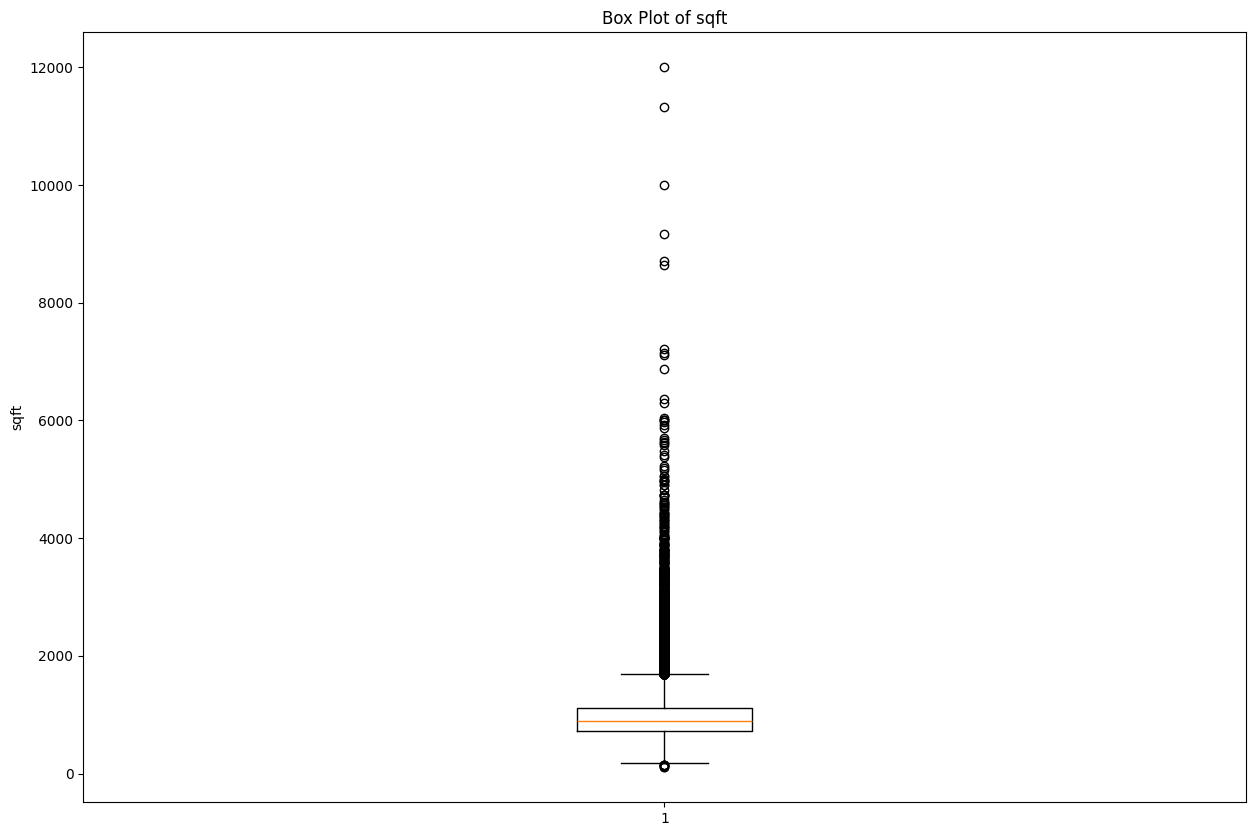

In [ ]:
plt.figure(figsize=(15, 10))
plt.boxplot(df['square_feet'])
plt.title("Box Plot of sqft")
plt.ylabel("sqft")
plt.show()

**Summary:**  
We observed a significant number of outliers in these two columns. For the `price` column, this could be due to a mix of rental listings where some prices are reported on a monthly basis, while others are listed on a weekly basis. For the `square_feet`, it might due to real-world variability in apartment sizes, inclusion of luxury or commercial properties, and data issues like entry errors or inconsistent units.

### 5.4. Checking Missing Value

In [ ]:
df.isnull().sum()

id                   0
category             0
title                0
body                 0
amenities        15840
bathrooms            0
bedrooms             0
currency             0
fee                  0
has_photo            0
pets_allowed         0
price                0
price_display        0
price_type           0
square_feet          0
cityname             0
state                0
latitude             0
longitude            0
source               0
time                 0
amenity_score        0
dtype: int64

In [ ]:
df.shape

(99006, 22)

### 5.5. Correlation Matrix

To explore the relationships between the numerical variables, we computed the correlation matrix and visualized it using a heatmap.

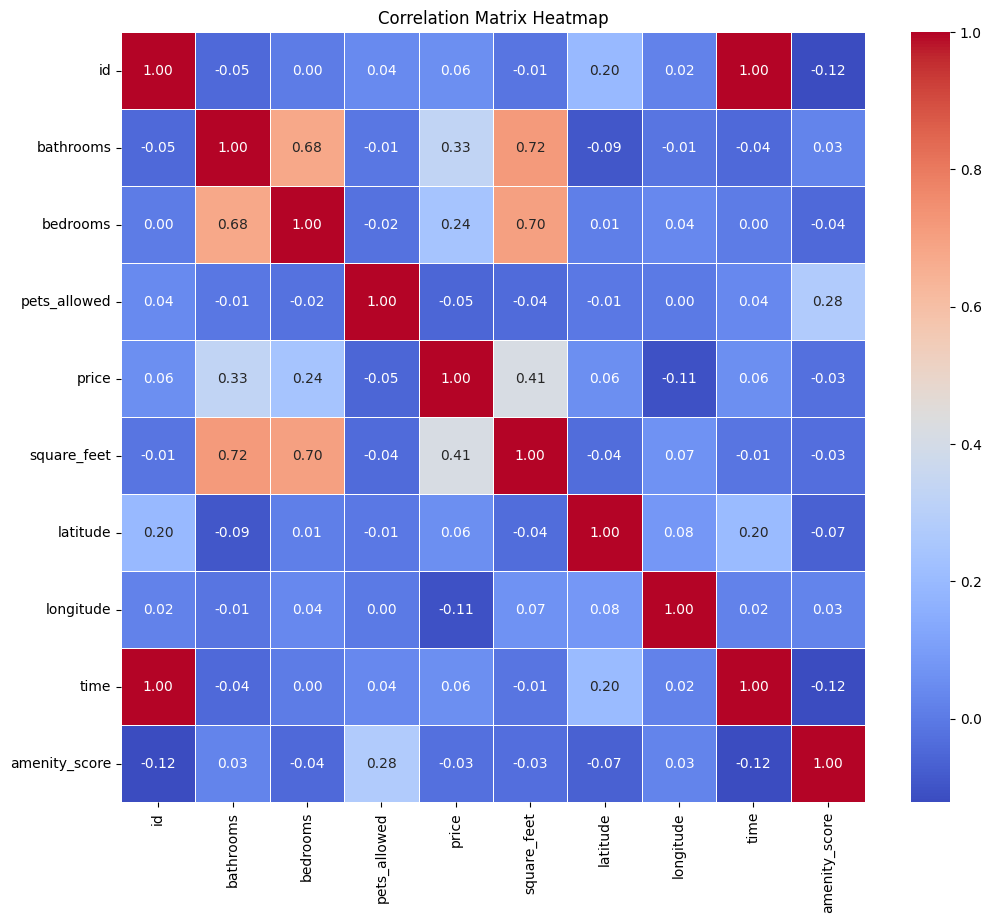

In [ ]:
numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

**Summary:**  
The dataset contains 99,492 rows and 22 columns, including numerical variables (e.g., `bathrooms`, `bedrooms`, `price`, `square_feet`) and categorical variables (e.g., `cityname`, `amenities`, `state`). Key observations include missing values in columns like `amenities`, `cityname`, and `pets_allowed`, which require cleaning or imputation. Visualizations revealed outliers in columns like `price` and `square_feet`, indicating the need for filtering or normalization. Correlation analysis highlighted relationships between numerical features. The cleaned dataset is refined for analysis.

## 6. Visulization

#### 6.1. Relationship Between Apartment Size, Rental Price, and Amenity Score

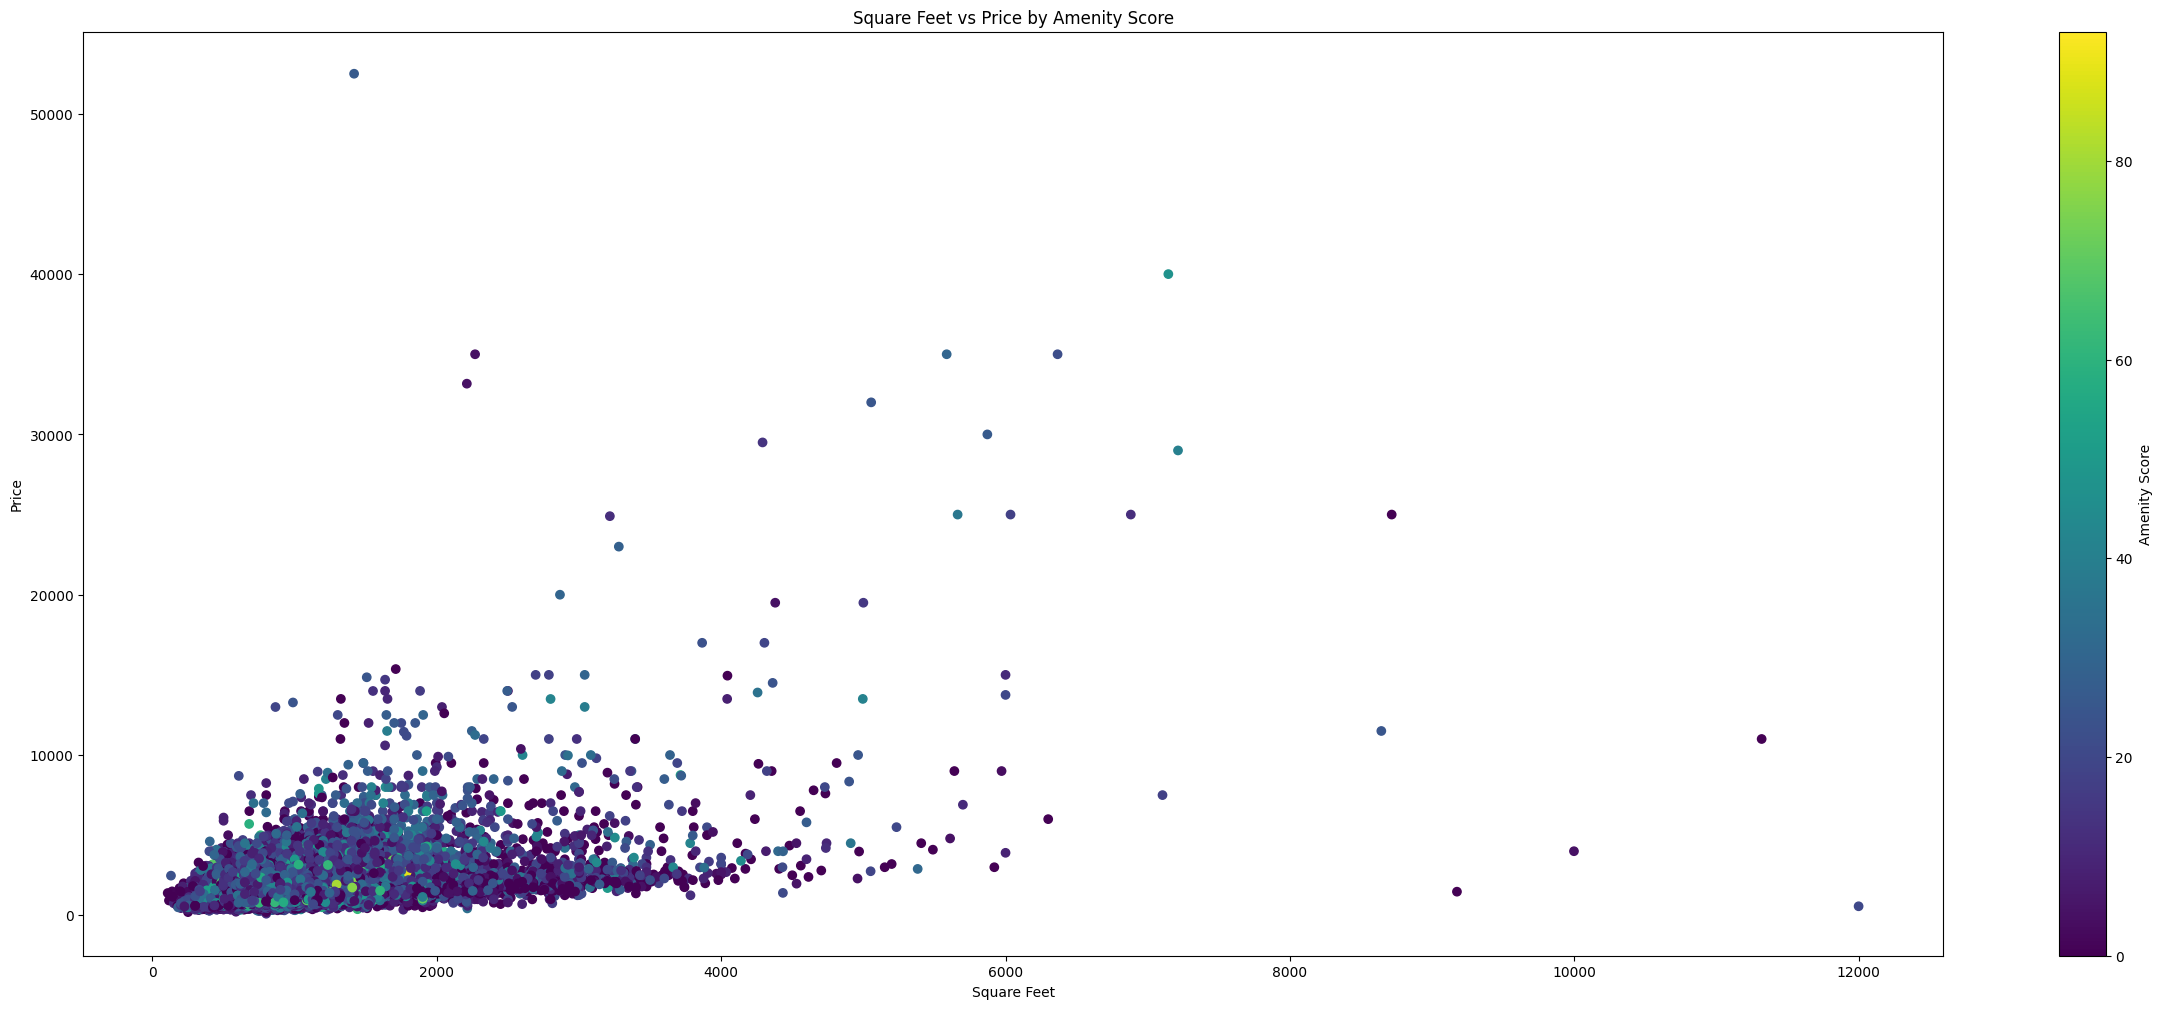

In [ ]:
plt.figure(figsize=(30, 12))
sc = plt.scatter(df['square_feet'], df['price'], c=df['amenity_score'], cmap='viridis')
plt.colorbar(sc, label='Amenity Score')
plt.xlabel('Square Feet')
plt.ylabel('Price')
plt.title('Square Feet vs Price by Amenity Score')
plt.show()

**Summary:**  
The scatter plot shows a positive correlation between square footage and rental price, with most properties clustered below 2,000 square feet and $10,000. Higher amenity scores (lighter colors) are generally associated with higher prices, though the relationship varies. Notable outliers include properties with extremely high prices or large square footage, likely representing luxury apartments or data inconsistencies.

#### 6.2. Monthly Trends in House Rental Prices (all states included)

<ipython-input-38-3404017a2351>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


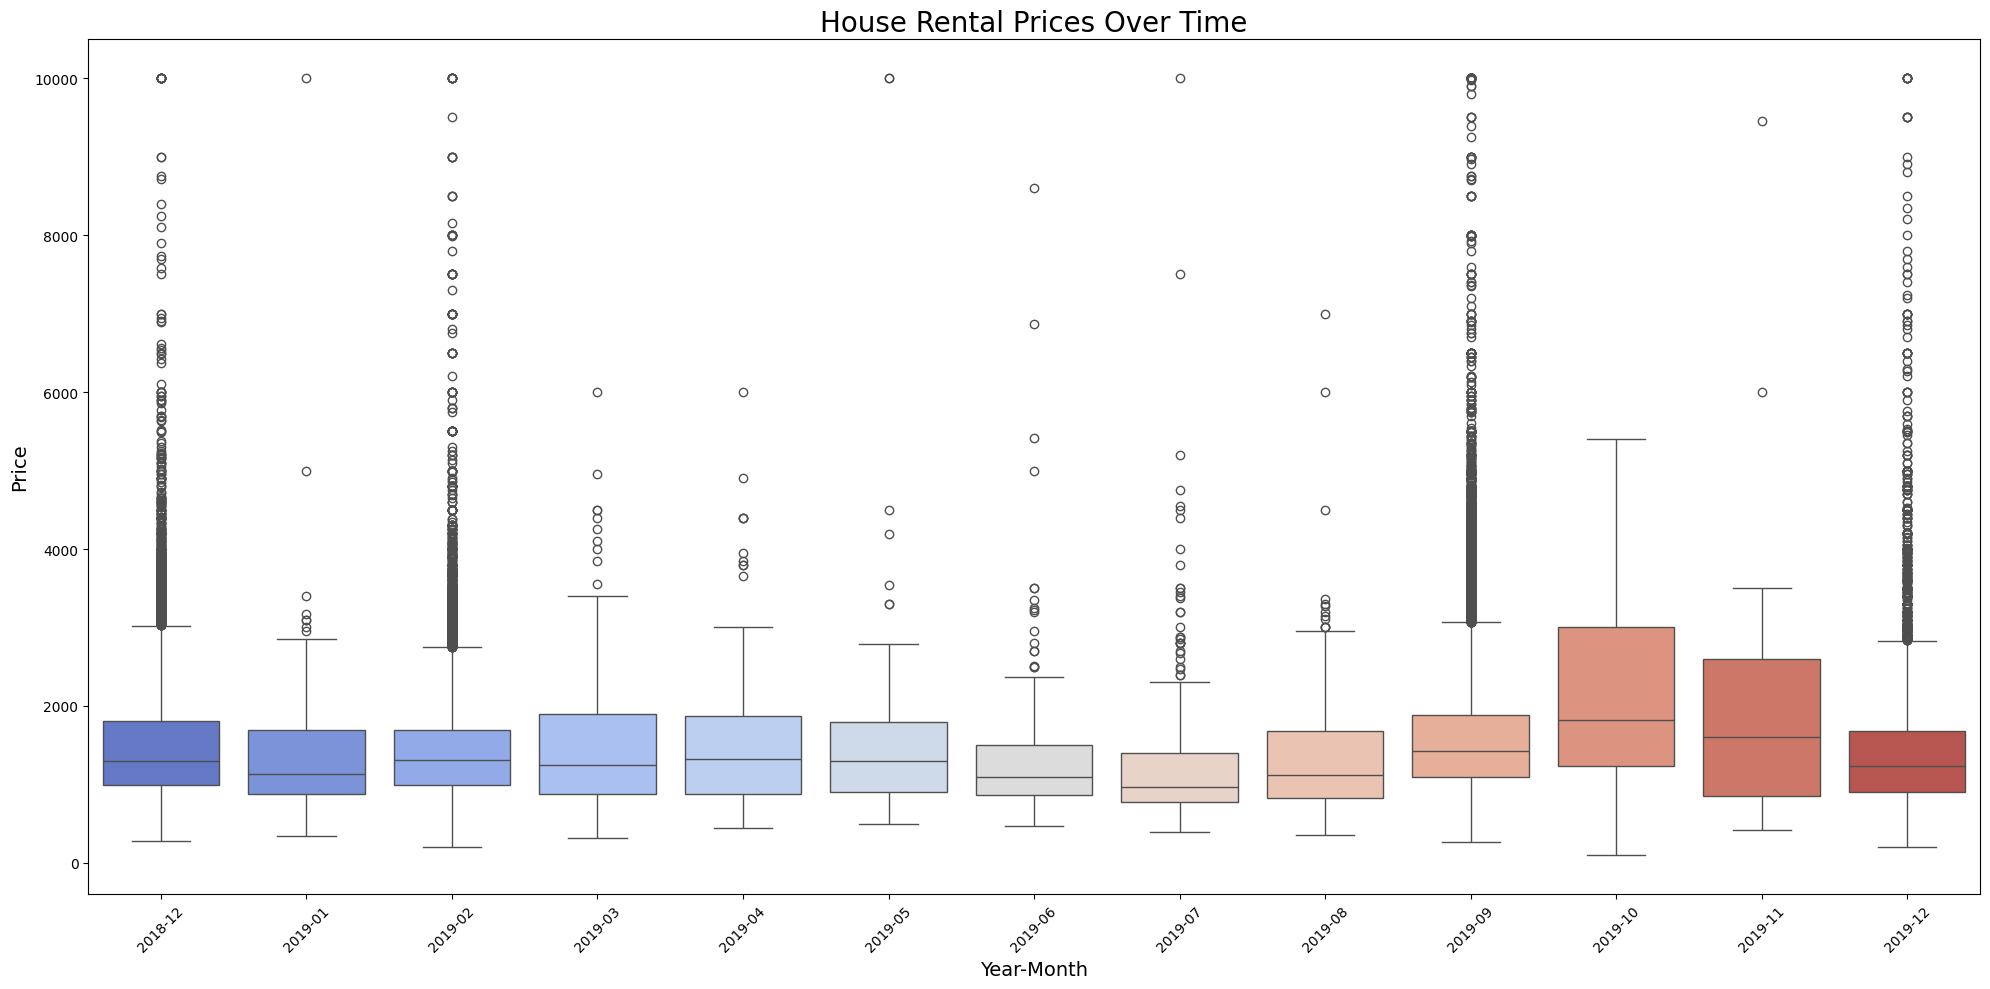

In [ ]:
if 'time' in df.columns:
    # Transfer 'time' into datetime format
    df['time'] = pd.to_datetime(df['time'], unit='s', errors='coerce')

    # Extract 'year' and 'month' columns
    df['year'] = df['time'].dt.year
    df['month'] = df['time'].dt.month

    # Transfer 'rentalDate' column as 'YYYY-MM'
    df['rentalDate'] = df['year'].astype(str) + '-' + df['month'].astype(str).str.zfill(2)


    if 'price' in df.columns:
        df['price'] = df['price'].clip(upper=10000)


        rental_date_order = sorted(df['rentalDate'].unique())


        plt.figure(figsize=(20, 10))
        plt.title('House Rental Prices Over Time', fontsize=20)
        sns.boxplot(
            data=df,
            x='rentalDate',
            y='price',
            palette="coolwarm",
            saturation=0.7,
            order=rental_date_order
        )


        plt.xticks(rotation=45, fontsize=10)
        plt.xlabel('Year-Month', fontsize=14)
        plt.ylabel('Price', fontsize=14)
        plt.tight_layout()
        plt.show()
    else:
        print("The 'price' column is missing from the dataset.")
else:
    print("The 'time' column is missing from the dataset.")

**Summary:**  
This box plot shows how house rental prices changed over time, month by month. The median price stays mostly stable, but some months have a wider range of prices. There are also many outliers with very high prices in every month. This suggests there might be seasonal patterns or special factors affecting prices.

#### 6.3. Monthly Trends in House Rental Prices in Massachusetts

<ipython-input-39-0962de65eedf>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_ma, x='rentalDate', y='price', palette="coolwarm", saturation=0.7, order=sorted(df_ma['rentalDate'].unique()))


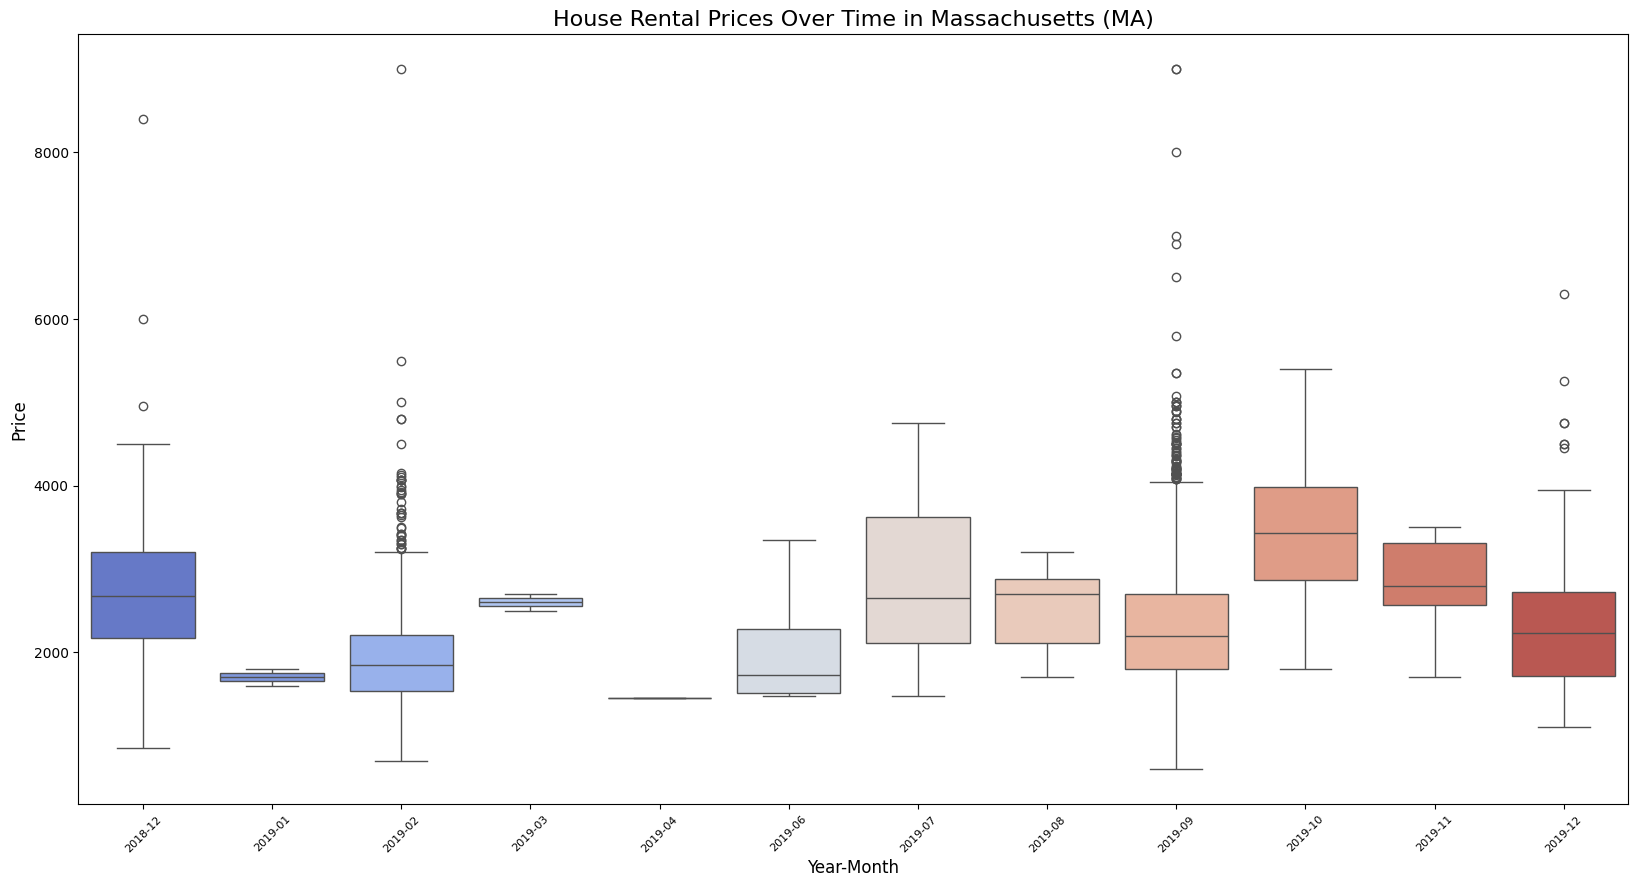

In [ ]:
df_ma = df[df['state'] == 'MA']

plt.figure(figsize=(20, 10))
plt.title('House Rental Prices Over Time in Massachusetts (MA)', fontsize=16)
sns.boxplot(data=df_ma, x='rentalDate', y='price', palette="coolwarm", saturation=0.7, order=sorted(df_ma['rentalDate'].unique()))

plt.xticks(rotation=45, fontsize=8)
plt.xlabel('Year-Month', fontsize=12)
plt.ylabel('Price', fontsize=12)

plt.show()

**Summary:**  
This box plot displays house rental prices in Massachusetts over time, broken down by month and year. Rental prices show fluctuations, with some months having a wider spread in prices, especially in mid-2019. Outliers with higher prices are present throughout, indicating luxury or unique properties. The median price varies slightly across months, reflecting potential seasonal trends or changes in the housing market.

#### 6.4. Median Apartment Rental Prices Across Top 25 U.S. States

<ipython-input-40-17c1c9a0bf8c>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


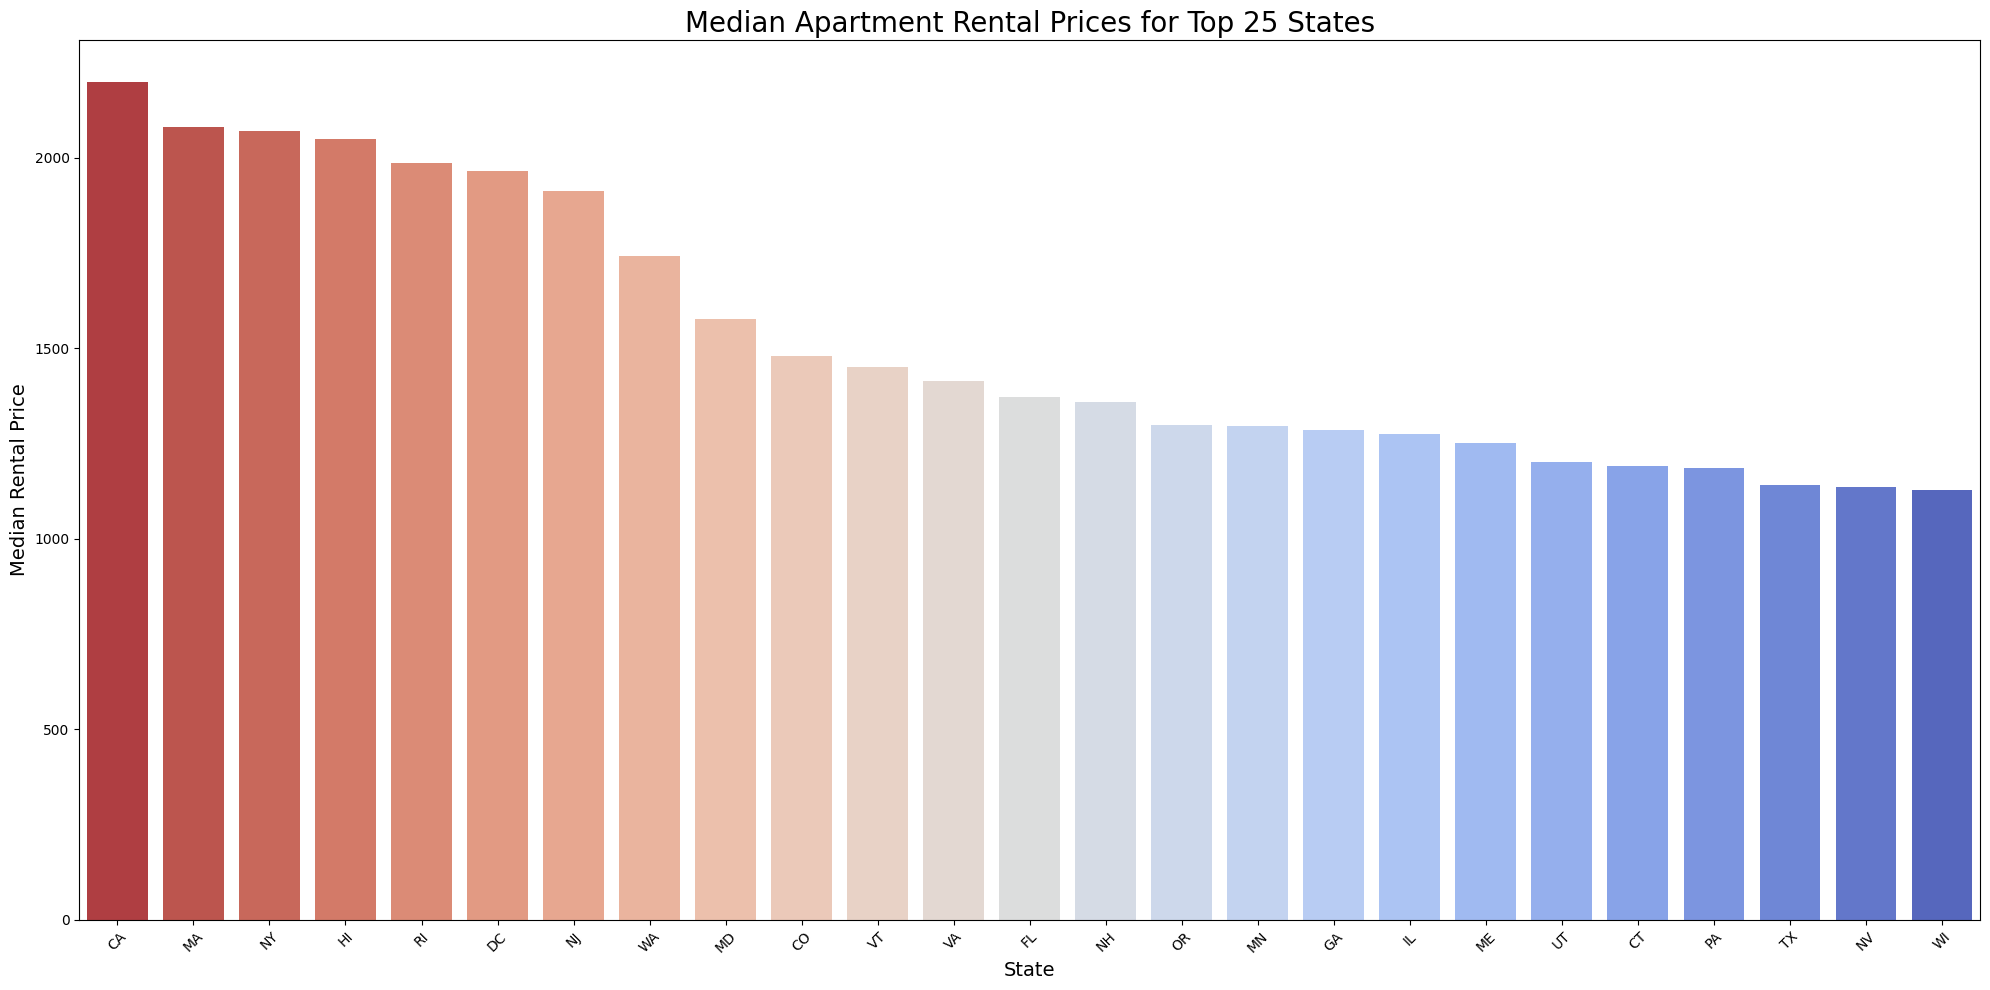

In [ ]:
state_m = df.groupby('state')['price'].median().reset_index()
top_25_states = state_m.sort_values(by='price', ascending=False).head(25)
plt.figure(figsize=(20, 10))

sns.barplot(
    data=top_25_states,
    x='state',
    y='price',
    palette=sns.color_palette("coolwarm_r", n_colors=len(top_25_states))
)

plt.title('Median Apartment Rental Prices for Top 25 States', fontsize=20)
plt.xlabel('State', fontsize=14)
plt.ylabel('Median Rental Price', fontsize=14)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()
plt.show()

**Summary:**  
This bar chart compares the median apartment rental prices across the top 25 U.S. states. California (CA) leads with the highest median rental price, followed by states like Massachusetts (MA), New York (NY), and Hawaii (HI). States towards the right, such as Wisconsin (WI), show relatively lower median prices. This visualization highlights significant variations in rental costs by state, reflecting regional housing market dynamics.

#### 6.5. Geographic Distribution of Rental Prices in Massachusetts

In [ ]:
!pip install folium
import folium

# Display the map directly in Colab
ma_map = folium.Map(location=[42.4072, -71.3824], zoom_start=8)
folium.Marker([42.4072, -71.3824], popup="Example Location").add_to(ma_map)

In [ ]:
from folium.plugins import MarkerCluster

# Filter the dataset for Massachusetts (MA)
ma_data = df[df['state'] == 'MA'].dropna(subset=['longitude', 'latitude', 'price'])

# Create a map centered around Massachusetts
ma_map = folium.Map(location=[42.4072, -71.3824], zoom_start=8)


for _, row in ma_data.iterrows():
    price = row['price']
    color = 'blue' if price < 2000 else 'green' if price <= 3000 else 'red'

    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=min(10, price / 500),
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.6,
        popup=f"Price: ${price}"
    ).add_to(ma_map)


ma_map


**Summary:**  
This map visualizes rental properties in Massachusetts, with markers indicating property locations and their rental prices represented by color and size. Larger and red markers denote higher-priced rentals, while smaller and blue markers represent lower-priced ones. The distribution shows that rental prices are concentrated and higher near urban centers like Boston, with lower prices more scattered in rural areas. This map highlights regional variations in rental affordability across Massachusetts.

#### 6.6. Geographic Distribution of Rental Prices in California

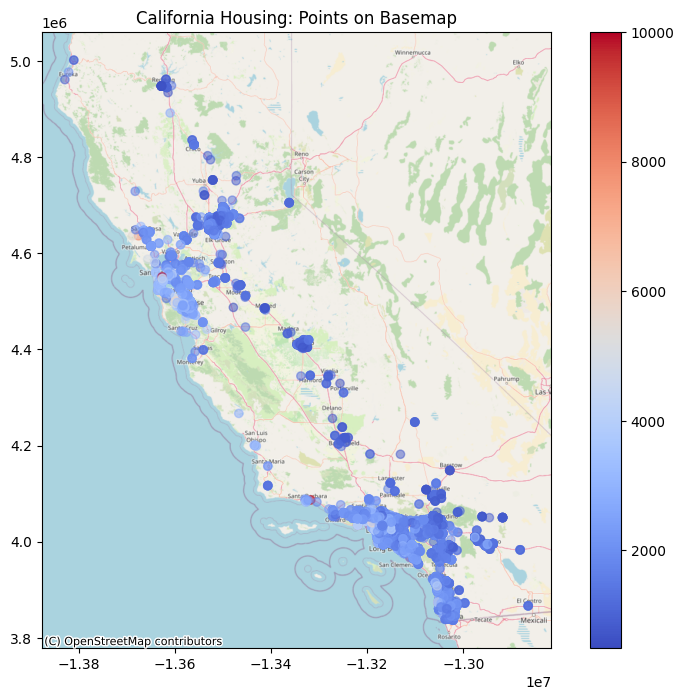

In [ ]:
!pip install contextily > /dev/null 2>&1
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt

# Filter the dataset for California and remove rows with missing prices
df_CA = df[df['state'] == 'CA']
df_CA = df_CA.dropna(subset=['price'])
df_CA.isnull().sum()


gdf = gpd.GeoDataFrame(
    df_CA,
    geometry=gpd.points_from_xy(df_CA.longitude, df_CA.latitude),
    crs="EPSG:4326"
)


gdf = gdf.to_crs(epsg=3857)


ax = gdf.plot(
    column='price',
    cmap='coolwarm',
    figsize=(10, 8),
    legend=True,
    alpha=0.5
)
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)  # Add basemap
plt.title('California Housing: Points on Basemap')
plt.show()

**Summary:**  
This map visualizes housing rental prices in California, with data points plotted over a basemap. The color gradient represents rental prices, ranging from blue for lower prices to red for higher prices. Most high-priced rentals are concentrated in urban areas such as Los Angeles and the San Francisco Bay Area. This visualization highlights the geographic distribution of rental affordability across California.

#### 6.7. Distribution of Bathrooms in Rental Properties

In [ ]:
def visualize_categorical_column(df, column_name):

    sns.set_style('whitegrid')
    fig, axes = plt.subplots(figsize=(12, 8))
    ax = sns.countplot(x=column_name, data=df, palette=['#e3784d', '#87ace8', '#6ecc64', '#b644e3', '#eb7c87', '#EAE509'])
    for container in ax.containers:
        ax.bar_label(container)
    plt.title(f'Frequency of {column_name}', fontsize=15)

<ipython-input-70-04c6011c974d>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=column_name, data=df, palette=['#e3784d', '#87ace8', '#6ecc64', '#b644e3', '#eb7c87', '#EAE509'])
<ipython-input-70-04c6011c974d>:5: UserWarning: 
The palette list has fewer values (6) than needed (16) and will cycle, which may produce an uninterpretable plot.
  ax = sns.countplot(x=column_name, data=df, palette=['#e3784d', '#87ace8', '#6ecc64', '#b644e3', '#eb7c87', '#EAE509'])


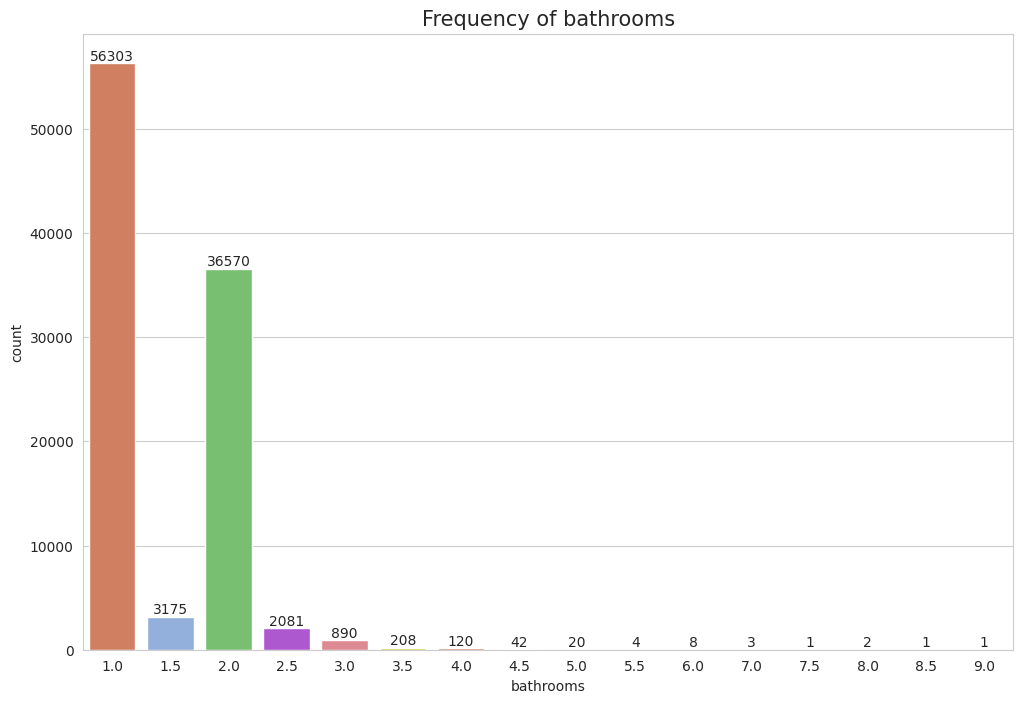

In [ ]:
visualize_categorical_column(df,"bathrooms")

**Summary:**  
This bar chart shows the distribution of bathrooms across rental properties. The majority of listings have 1 or 2 bathrooms, with 56,303 properties having 1 bathroom and 36,570 having 2 bathrooms. Properties with more than 2 bathrooms are significantly fewer, with the count sharply declining as the number of bathrooms increases. This indicates that smaller units with 1-2 bathrooms dominate the rental market.

#### 6.8. Distribution of Bedrooms in Rental Properties

<ipython-input-70-04c6011c974d>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=column_name, data=df, palette=['#e3784d', '#87ace8', '#6ecc64', '#b644e3', '#eb7c87', '#EAE509'])
<ipython-input-70-04c6011c974d>:5: UserWarning: 
The palette list has fewer values (6) than needed (10) and will cycle, which may produce an uninterpretable plot.
  ax = sns.countplot(x=column_name, data=df, palette=['#e3784d', '#87ace8', '#6ecc64', '#b644e3', '#eb7c87', '#EAE509'])


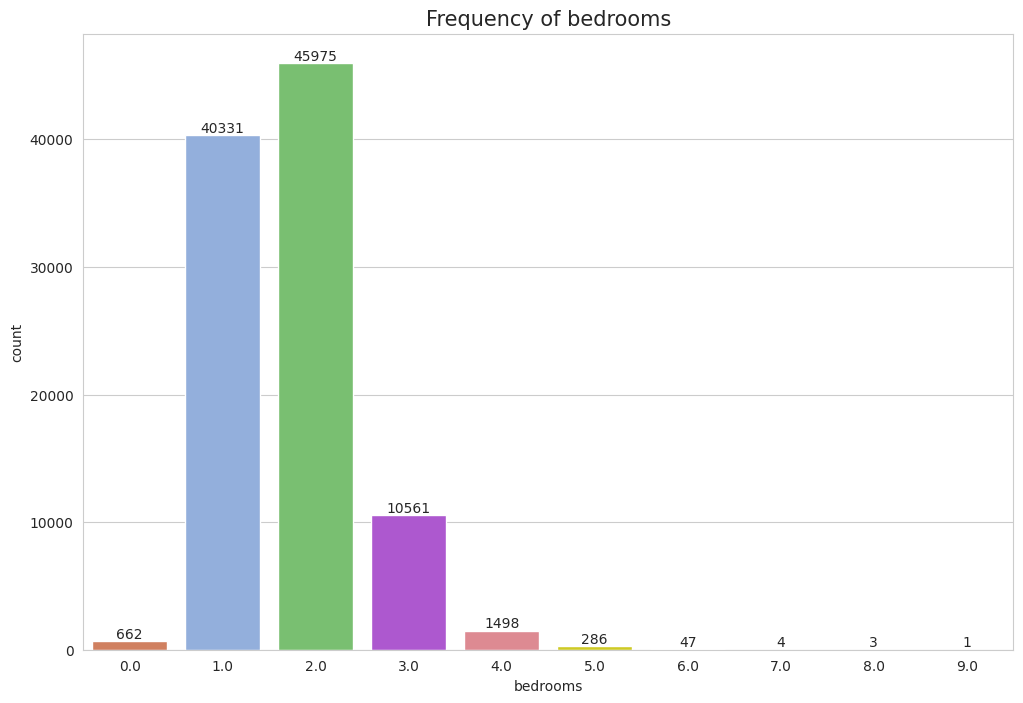

In [ ]:
visualize_categorical_column(df,"bedrooms")

**Summary:**  
This bar chart illustrates the distribution of bedrooms in rental properties. Most properties have 1 or 2 bedrooms, with 45,975 units having 2 bedrooms and 40,331 units having 1 bedroom. Properties with 3 bedrooms account for 10,561 units, while those with 4 or more bedrooms are rare, with counts decreasing sharply as the number of bedrooms increases. This indicates that smaller units dominate the rental market.

### 6.9. Summary of whole section
The visualizations reveal key trends in the dataset. Most rental properties have 1-2 bathrooms and bedrooms, indicating smaller units dominate the market. Rental prices are stable over time, with occasional fluctuations and high-price outliers. Maps show higher rental prices concentrated in urban areas like Boston and Los Angeles, while rural regions offer more affordable options. Additionally, a state-wise comparison highlights significant price variations, with California, Massachusetts, and New York leading in median rental costs. These insights emphasize regional and temporal trends in the rental market.